# This notebook demonstrates how quick hull can be computed for a spectra, and removed recursively to identify absorption bands.

In [1]:
from cHullRemover import cHullRemover

In [2]:
import numpy as np
import requests
import matplotlib.pyplot as plt

In [3]:
#Declare NP array of CRISM IR WAVELENGTHS 
wavelengthsStr='1.00135;1.0079;1.01445;1.021;1.02755;1.0341;1.04065;1.0472;1.05375;1.0603;1.06685;1.07341;1.07996;1.08651;1.09307;1.09962;1.10617;1.11273;1.11928;1.12584;1.13239;1.13895;1.14551;1.15206;1.15862;1.16518;1.17173;1.17829;1.18485;1.19141;1.19797;1.20453;1.21109;1.21765;1.22421;1.23077;1.23733;1.24389;1.25045;1.25701;1.26357;1.27014;1.2767;1.28326;1.28983;1.29639;1.30295;1.30952;1.31608;1.32265;1.32921;1.33578;1.34234;1.34891;1.35548;1.36205;1.36861;1.37518;1.38175;1.38832;1.39489;1.40145;1.40802;1.41459;1.42116;1.42773;1.43431;1.44088;1.44745;1.45402;1.46059;1.46716;1.47374;1.48031;1.48688;1.49346;1.50003;1.50661;1.51318;1.51976;1.52633;1.53291;1.53948;1.54606;1.55264;1.55921;1.56579;1.57237;1.57895;1.58552;1.5921;1.59868;1.60526;1.61184;1.61842;1.625;1.63158;1.63816;1.64474;1.65133;1.65791;1.66449;1.67107;1.67766;1.68424;1.69082;1.69741;1.70399;1.71058;1.71716;1.72375;1.73033;1.73692;1.74351;1.75009;1.75668;1.76327;1.76985;1.77644;1.78303;1.78962;1.79621;1.8028;1.80939;1.81598;1.82257;1.82916;1.83575;1.84234;1.84893;1.85552;1.86212;1.86871;1.8753;1.8819;1.88849;1.89508;1.90168;1.90827;1.91487;1.92146;1.92806;1.93465;1.94125;1.94785;1.95444;1.96104;1.96764;1.97424;1.98084;1.98743;1.99403;2.00063;2.00723;2.01383;2.02043;2.02703;2.03363;2.04024;2.04684;2.05344;2.06004;2.06664;2.07325;2.07985;2.08645;2.09306;2.09966;2.10627;2.11287;2.11948;2.12608;2.13269;2.1393;2.1459;2.15251;2.15912;2.16572;2.17233;2.17894;2.18555;2.19216;2.19877;2.20538;2.21199;2.2186;2.22521;2.23182;2.23843;2.24504;2.25165;2.25827;2.26488;2.27149;2.2781;2.28472;2.29133;2.29795;2.30456;2.31118;2.31779;2.32441;2.33102;2.33764;2.34426;2.35087;2.35749;2.36411;2.37072;2.37734;2.38396;2.39058;2.3972;2.40382;2.41044;2.41706;2.42368;2.4303;2.43692;2.44354;2.45017;2.45679;2.46341;2.47003;2.47666;2.48328;2.4899;2.49653;2.50312;2.50972;2.51632;2.52292;2.52951;2.53611;2.54271;2.54931;2.55591;2.56251;2.56911;2.57571;2.58231;2.58891;2.59551;2.60212;2.60872;2.61532;2.62192;2.62853;2.63513;2.64174;2.64834;2.65495;2.66155;2.66816;2.67476;2.68137;2.68798;2.69458;2.70119;2.76068;2.76729;2.7739;2.78052;2.78713;2.79374;2.80035;2.80697;2.81358;2.8202;2.82681;2.83343;2.84004;2.84666;2.85328;2.85989;2.86651;2.87313;2.87975;2.88636;2.89298;2.8996;2.90622;2.91284;2.91946;2.92608;2.9327;2.93932;2.94595;2.95257;2.95919;2.96581;2.97244;2.97906;2.98568;2.99231;2.99893;3.00556;3.01218;3.01881;3.02544;3.03206;3.03869;3.04532;3.05195;3.05857;3.0652;3.07183;3.07846;3.08509;3.09172;3.09835;3.10498;3.11161;3.11825;3.12488;3.13151;3.13814;3.14478;3.15141;3.15804;3.16468;3.17131;3.17795;3.18458;3.19122;3.19785;3.20449;3.21113;3.21776;3.2244;3.23104;3.23768;3.24432;3.25096;3.2576;3.26424;3.27088;3.27752;3.28416;3.2908;3.29744;3.30408;3.31073;3.31737;3.32401;3.33066;3.3373;3.34395;3.35059;3.35724;3.36388;3.37053;3.37717;3.38382;3.39047;3.39712;3.40376;3.41041;3.41706;3.42371;3.43036;3.43701;3.44366;3.45031;3.45696;3.46361;3.47026;3.47692;3.48357;3.49022;3.49687;3.50353;3.51018;3.51684;3.52349;3.53015;3.5368;3.54346;3.55011;3.55677;3.56343;3.57008;3.57674;3.5834;3.59006;3.59672;3.60338;3.61004;3.6167;3.62336;3.63002;3.63668;3.64334;3.65;3.65667;3.66333;3.66999;3.67665;3.68332;3.68998;3.69665;3.70331;3.70998;3.71664;3.72331;3.72998;3.73664;3.74331;3.74998;3.75665;3.76331;3.76998;3.77665;3.78332;3.78999;3.79666;3.80333;3.81;3.81667;3.82335;3.83002;3.83669;3.84336;3.85004;3.85671;3.86339;3.87006;3.87673;3.88341;3.89008;3.89676;3.90344;3.91011;3.91679;3.92347;3.93015;3.93682;4'
wavelengths=np.asarray([float(x) for x in wavelengthsStr.split(';')])

In [4]:
# Get some data to work with
getCSVUrl=lambda uid,Em,Nm:'http://access.planetserver.eu/rasdaman/ows?query=for c in (%(a)s) return encode(c[E(%(b)s),N(%(c)s)],"csv")' %{'a':uid,'b':Em,'c':Nm}
csvLink=getCSVUrl('hrl0000bfa9_07_if181l_trr3',1365503.4753621197,-1647178.4152715886)
csvLink # Download link for CRISM spectrum from PlanetServer

'http://access.planetserver.eu/rasdaman/ows?query=for c in (hrl0000bfa9_07_if181l_trr3) return encode(c[E(1365503.4753621197),N(-1647178.4152715886)],"csv")'

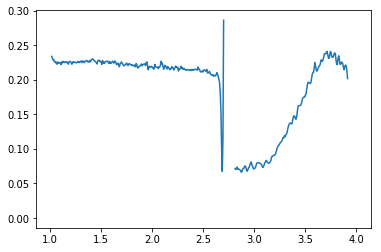

In [5]:
r=requests.get(csvLink) # Download spectra
values=[float(x) for x in r.content.decode('utf-8')[1:-1].split(' ')]
valuesMasked=np.ma.masked_array(np.asarray(values),np.asarray(values)>100,fill_value=np.nan).filled()
# plot reflectances against wavelengths
plt.plot(wavelengths, valuesMasked) # Plot CRISM spectra
plt.show()

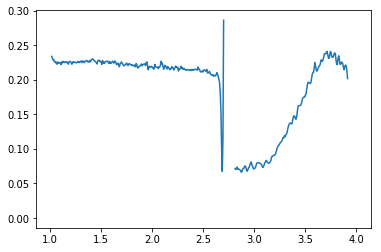

In [6]:
# Combine wavelenghts and values into a data sample array
sample=np.asarray([*zip(wavelengths, valuesMasked)]).T # convert masked to nan
plt.plot(*sample);plt.show() # Plot

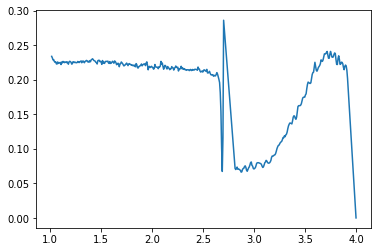

In [7]:
# Remove nodata values from the spectrum
pSample=cHullRemover.removeNoData(sample)
plt.plot(*pSample);plt.show()

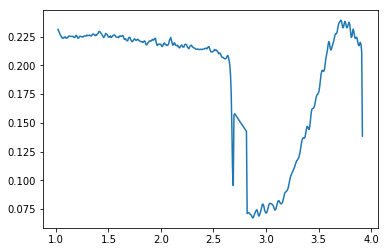

In [8]:
# Apply smoothing by moving average
sSample=cHullRemover.smooth(pSample)
plt.plot(*sSample);plt.show()

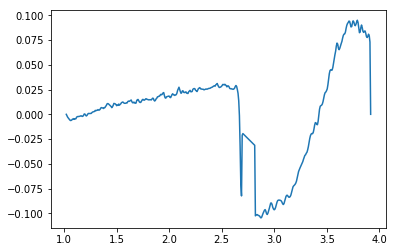

In [9]:
#remove continuum
rcs=cHullRemover.removeContinuum(sSample) # rcs for removed continuum smooth
plt.plot(*rcs);plt.show()

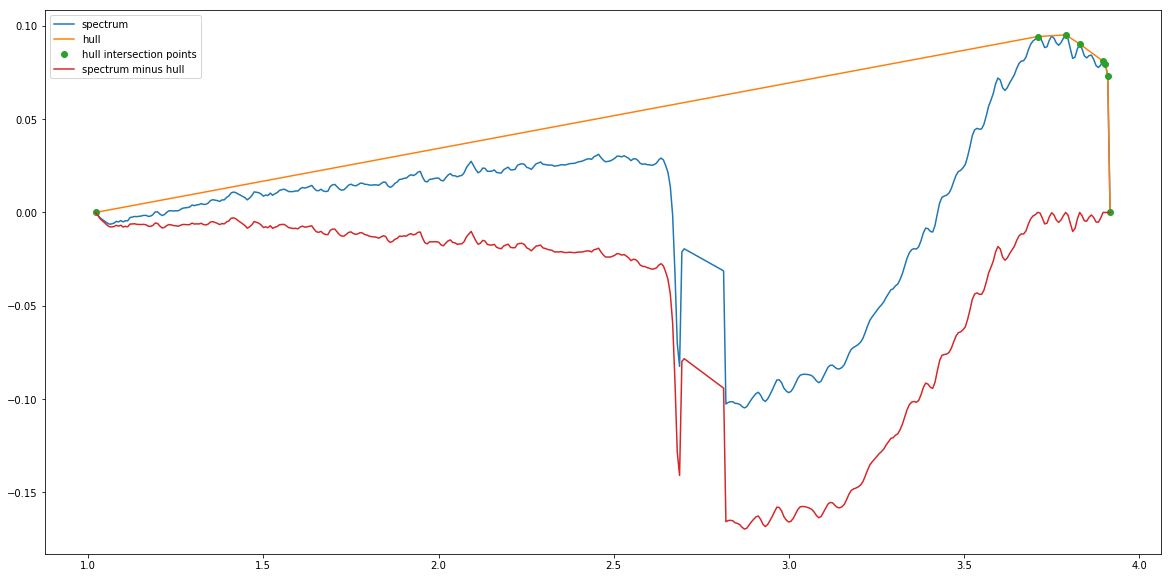

In [30]:
plt.figure(figsize=(20,10))
plt.plot(*rcs, label="spectrum") # plot spectrum
rcsHull=cHullRemover.getHull(rcs) #compute convex hull
plt.plot(*rcsHull, label="hull") # plot hull
plt.plot(*rcsHull, 'o', label="hull intersection points") # plot hull
rscMinusHull=cHullRemover.subtractSpectra(rcs, rcsHull) # subtract hull from spectrum
plt.plot(*rscMinusHull, label="spectrum minus hull") # plot spectrum minus hull
plt.legend()
plt.show()

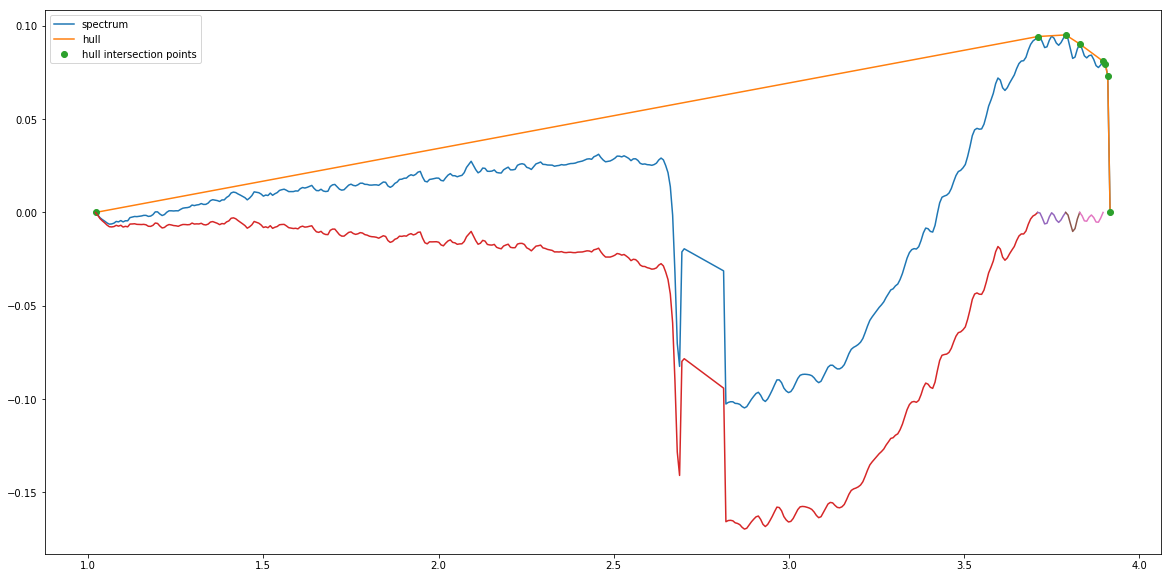

In [31]:
plt.figure(figsize=(20,10))
plt.plot(*rcs, label="spectrum") # plot spectrum
rcsHull=cHullRemover.getHull(rcs) #compute convex hull
plt.plot(*rcsHull, label="hull") # plot hull
plt.plot(*rcsHull, 'o', label="hull intersection points") # plot hull
rscMinusHull=cHullRemover.subtractSpectra(rcs, rcsHull) # subtract hull from spectrum
# Split sample by intersection points with the hull:
for _ in cHullRemover.splitSample(rcs,cHullRemover.getHull(rcs)): plt.plot(*_)
plt.legend()
plt.show()

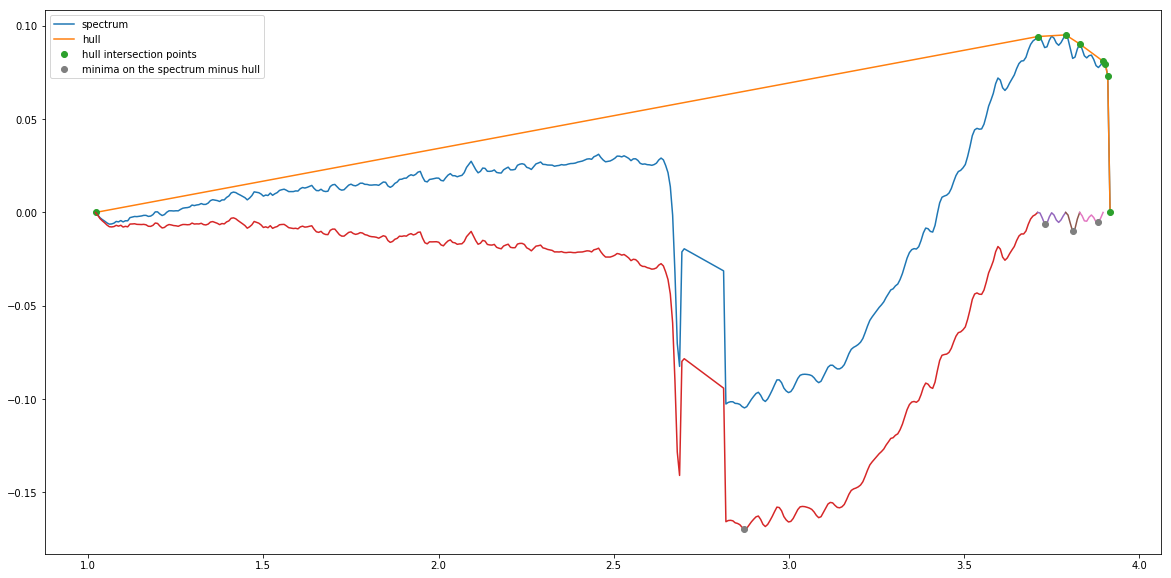

In [36]:
plt.figure(figsize=(20,10))
plt.plot(*rcs, label="spectrum") # plot spectrum
rcsHull=cHullRemover.getHull(rcs) #compute convex hull
plt.plot(*rcsHull, label="hull") # plot hull
plt.plot(*rcsHull, 'o', label="hull intersection points") # plot hull
rscMinusHull=cHullRemover.subtractSpectra(rcs, rcsHull) # subtract hull from spectrum
# Split sample by intersection points with the hull:
for _ in cHullRemover.splitSample(rcs,cHullRemover.getHull(rcs)): plt.plot(*_)

# Find minimum on each segment:
plt.plot(*cHullRemover.listMinimaWrtHull(rcs,rcsHull), 'o', label="minima on the spectrum minus hull") # plot hull

plt.legend()
plt.show()

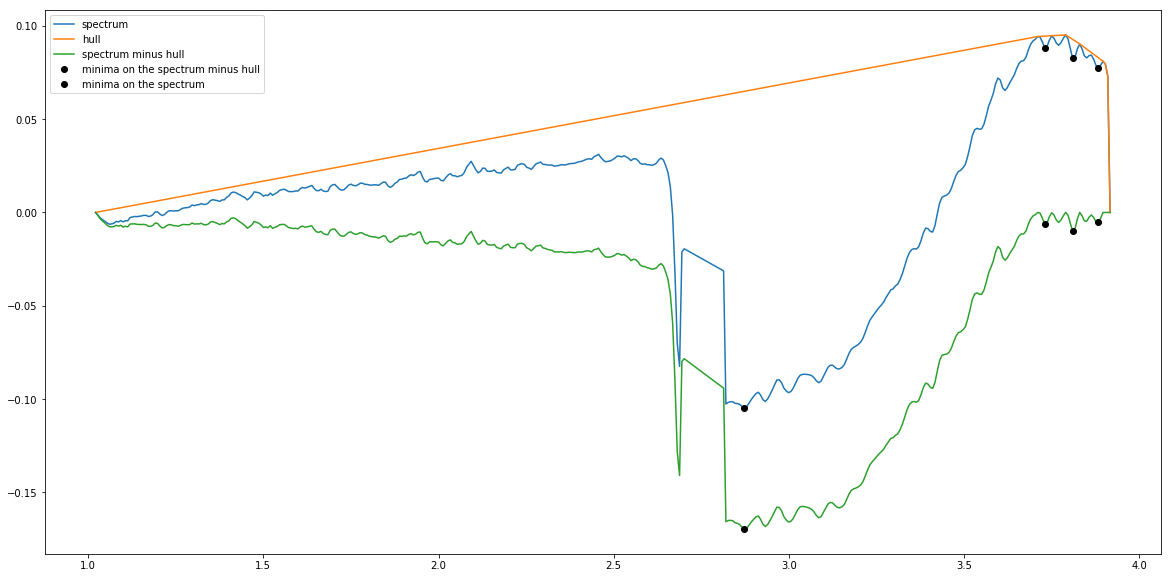

In [42]:
plt.figure(figsize=(20,10))
plt.plot(*rcs, label="spectrum") # plot spectrum
rcsHull=cHullRemover.getHull(rcs) #compute convex hull
plt.plot(*rcsHull, label="hull") # plot hull
rscMinusHull=cHullRemover.subtractSpectra(rcs, rcsHull) # subtract hull from spectrum
plt.plot(*rscMinusHull, label="spectrum minus hull") # plot spectrum minus hull

# Find minimum on each segment:
plt.plot(*cHullRemover.listMinimaWrtHull(rcs,rcsHull), 'o',color='black', label="minima on the spectrum minus hull") 

#Plot these minimum on the spectrum
plt.plot(*cHullRemover.listMinimaWrtSample(rcs), 'o',color='black', label="minima on the spectrum")

plt.legend()
plt.show()

# This process can be done recurively by splitting spectra at its minima and recalculating and resubtracting the hull
To Be Continued...